<a href="https://colab.research.google.com/github/Lanjouw/Winc/blob/main/Copy_of_describing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://static.wincacademy.nl/logos/main-logo.png" height=200px style="height: 200px"/>

# Describing Data

In [5]:
!pip install matplotlib --user > /dev/null 2>&1
!pip install numpy --user > /dev/null 2>&1
!pip install pandas --user > /dev/null 2>&1

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Describing a dataset is surprisingly hard. Take this (simulated) data containing total income in 1980 for each of the 100.000 inhabitans of Fooville, for example.

In [6]:
income_samples = np.round(np.hstack([np.random.normal(2.5e4, 5e3, int(7e4)),
                                     np.random.normal(5.5e4, 4e3, int(2e4)),
                                     np.random.normal(9e4, 2e3, int(1e4))]),
                          2)
income_samples[income_samples < 0] = - income_samples[income_samples < 0]
np.random.shuffle(income_samples)

pd.DataFrame(income_samples, columns=['Income'])

,Income
0,34089.86
1,23730.48
2,30031.01
3,25919.49
4,90070.41
...,...
99995,20414.76
99996,54683.15
99997,21803.54
99998,25950.11


These are 100k datapoints. It's impossible to look at them all one by one. How are we going to interpret that large bag of unsorted data?

## Mean

One measure we should take a look at is the average, the **mean** of the data. The mean is calculated like so:

1. Sum up all the values
2. Divide them by the number of datapoints

Let's apply this to our data from the inhabitants of Fooville.

In [7]:
income_samples_mean = np.mean(income_samples)
print(f'The mean income in Fooville is {income_samples_mean:.2f}')

The mean income in Fooville is 37512.94


**1. What is the mean of this list of numbers? [1, 9, 19, 100]**

*TODO: (1+9+19+100)/4 = 129/4 = 32,25

You, like me, might now be tempted to believe the data looks something like this.

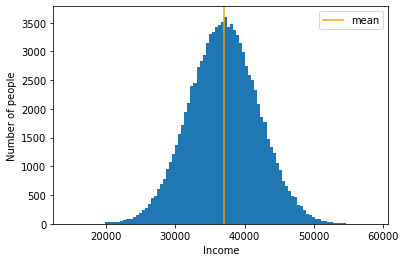

In [8]:
fig, ax = plt.subplots()
bin_vals, _, _ = ax.hist([np.random.normal(3.7e4, 5e3, int(10e4))], 100)
ax.axvline(3.7e4, label='mean', color='orange')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.legend();

**2. Explain how we should read this plot in your own words. Discuss specifically why the edge of the plot is not smooth. Hint: it's called a histogram.**

*TODO: The majority (mean) of income is on average 37000. 3500 people has this income. Since it's an average its not precise

**3. Why did we choose to draw the mean as a line, and not as a dot?**

*TODO: A line is easier to see, and its clear that its in the middle and divide the histogram in 2 equal parts

**4. How realistic is it that this plot reflects the true situation, given the type of data we are looking at?**

*TODO: Its not realistic since its based on an average, the used intervals can differ a lot from eachother. However the plot seems smooth due the average of the value per plot 

Let's take a look at the *real* histogram now.

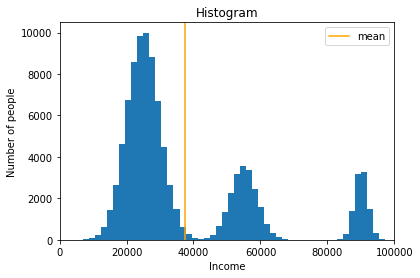

In [9]:
fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=50)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

**5. Why is the mean not located at a peak in the histogram?**

*TODO: The income values are plotted as is and not based on the amount of values

**6. How can the two plots look so different, even though their mean is the same?**

*TODO: the mean is always based on all values added up divided by the number of values. So in all cases the mean will be the same.

**7. How much useful information does the mean give about the data here, in your opinion? Explain why.**

*TODO: The mean will tell the average of all income values, so we can interpret the plot with an above and below average income. Imo the mean is useful


## Median


An alternative measure that may be more useful is the **median**. The median is the middle value in a sorted list of all the data. Here's how to find the median:

1. Sort the data.
2. Find the middle number. If there are an even number of datapoints, take the mean of the middle two.

In [10]:
income_samples_median = np.median(income_samples)
print(f'The median income in Fooville is {income_samples_median:.2f}')

The median income in Fooville is 27809.04


Let's visualize where it is exactly on our histogram.

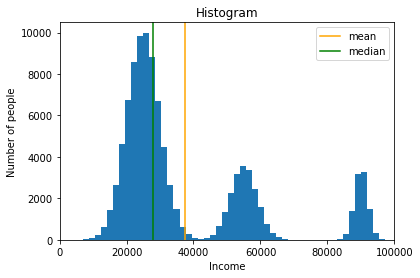

In [11]:
fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=50)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.axvline(income_samples_median, color='green', label='median')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

**8. Is the median more informative about this dataset, in your opinion? Why? Consider the type of data that you're looking at.**

*TODO: the median is the middle of all income values and not altered by extremes on both sides so for knowing the income for most its valueable

**9. How many people in Fooville have an income below the median? How many have an income above the median?**

*TODO: 50%

**10. Which way does the median move if we mirror the data like we did in the bottom plot below? Which way does the mean move? Finally: which one moves more? Explain your answers.**

*TODO: To the right, the amount at the left side is equal to right side

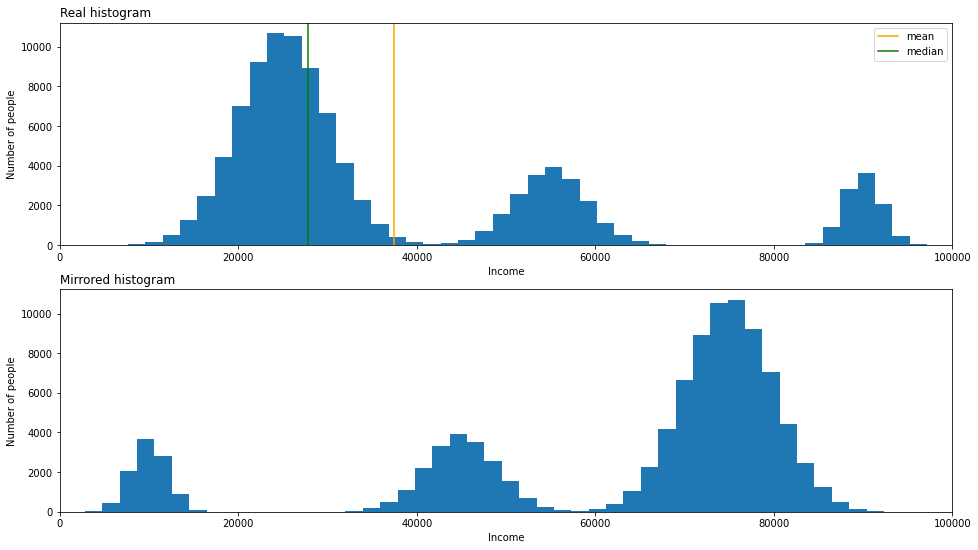

In [ ]:
mirrored_income_samples = 0 - income_samples + 1e5

fig, axs = plt.subplots(2, 1, figsize=(16,9))
axs[0].set_title('Real histogram', loc='left')
axs[0].hist(income_samples, bins=50)
axs[0].axvline(income_samples_mean, color='orange', label='mean')
axs[0].axvline(income_samples_median, color='green', label='median')
axs[0].set_xlabel('Income')
axs[0].set_ylabel('Number of people')
axs[0].set_xlim([0, 1e5])
axs[0].legend();
axs[1].set_title('Mirrored histogram', loc='left')
axs[1].hist(mirrored_income_samples, bins=50)
axs[1].set_xlabel('Income')
axs[1].set_ylabel('Number of people')
axs[1].set_xlim([0, 1e5]);

## Mode and binning

A third number that gives some information about data is distributed is the **mode**. This is the value that occurs most frequently out of all the values.

Let's count how often each number occurs in our (non-mirrored) dataset and see which one occurs most often.

The mode of the income data from Fooville is 20495.56.
It occurs 3 times.


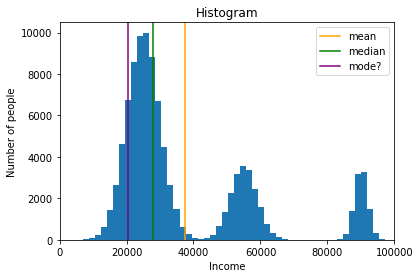

In [12]:
unique, frequency = np.unique(income_samples, return_counts = True)
income_samples_mode_freq = np.max(frequency)
income_samples_mode = unique[np.argmax(frequency)]
print(f'The mode of the income data from Fooville is {income_samples_mode:.2f}.\n'
      f'It occurs {income_samples_mode_freq} times.')

fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=50)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.axvline(income_samples_median, color='green', label='median')
ax.axvline(income_samples_mode, color='purple', label='mode?')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

Hm! This does not match with what we learn from our histogram.

**11. What level of income would you have expected to be the mode?**

*TODO: The mean value*

**12. What is the problem that caused us to land on a strange value for the mode?**

*TODO: the mode is based on exact the same number for income, even a 0.01 difference doesnt count so the mode can not be used for determine the average income

The problem that we have can be solved by *binning* the numbers in our data. Here's how that works:

1. Choose a number of *bins*. Think of these like buckets.
2. Divide the area between the minimum and maximum values of the data into smaller areas according to the number of bins.
3. Look at each datapoint and put it in the bin that it belongs to.
4. Count how many datapoints are in each bin.
5. Let each bin be represented by the middle value of the bin.

Let's do this and find the mode again.

The mode of the income data from Fooville is 24199.07.
It occurs 10683 times.


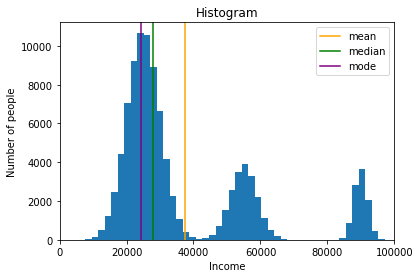

In [ ]:
# PLAY AROUND WITH THIS VALUE
bins = 50
# DON'T MODIFY THE LINES BELOW

hist, bin_edges = np.histogram(income_samples, bins=bins)
income_samples_mode_freq = np.max(hist)
mode_bin_index = np.argmax(hist)
income_samples_mode = np.mean(bin_edges[mode_bin_index:mode_bin_index+2])
print(f'The mode of the income data from Fooville is {income_samples_mode:.2f}.\n'
      f'It occurs {income_samples_mode_freq} times.')
fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=bins)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.axvline(income_samples_median, color='green', label='median')
ax.axvline(income_samples_mode, color='purple', label='mode')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

**13. How did binning solve the problem you described in your answer to question 12?**

*TODO: Since the value doesnt have to be exact but is grouped with close matches in a bin it overcome the problem of that value must be the exact same. 

**14. Would a bin count of 3 suffice? What about 100? What is the consideration in choosing a higher or lower bin count? And what is the downside of going too far in either direction?**

*TODO: 3 is not enough sice you got 3 datapoints and that wil result in a very rough plot, 100 seems better, we have 100000 datapoints dividing that in 100 bins gives a smoother plot. the larger the amount of bins the more the data must be sorted and putted in the correct bin and therefore more resourses / time will be needed in executing

## Quartiles and Boxplots

Finally, we will describe our data with a few extra measures:

- The min; the lowest value in the dataset.
- The max; the highest value in the dataset.
- The first quartile; the median of the lower half of the dataset. You find this value by sorting the data and selecting the middle of the lower half.
- The third quartile; the median of the upper half of the dataset. You find this value by sorting the data and selecting the middle of the upper half.

Together with the median, this is called the *five-number summary*. It is common to visualize these numbers in a type of plot that's called a *boxplot*. Here it is for the Fooville data.

The minimum is at 6961.4
The first quartile is at 23195.7
The third quartile is at 52325.47
The maximum is at 97160.91


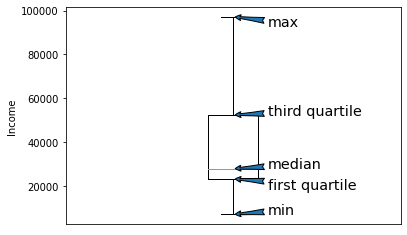

In [14]:
fig, ax = plt.subplots()
ax.boxplot(income_samples, whis=(0,100))
sorted_income_samples = np.sort(income_samples)
minimum = np.min(income_samples)
maximum = np.max(income_samples)
first_quartile = sorted_income_samples[int(sorted_income_samples.shape[0] / 4)]
third_quartile = sorted_income_samples[int(3 * sorted_income_samples.shape[0] / 4)]
ax.annotate('min', (1, minimum), fontsize='x-large', xytext=(35, 0), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('max', (1, maximum), fontsize='x-large', xytext=(35, -10), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('median', (1, income_samples_median), fontsize='x-large', xytext=(35, 0), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('first quartile', (1, first_quartile), fontsize='x-large', xytext=(35, -10), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('third quartile', (1, third_quartile), fontsize='x-large', xytext=(35, 0), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.set_ylabel('Income')
ax.set_xticks([])

print(f'The minimum is at {minimum}')
print(f'The first quartile is at {first_quartile}')
print(f'The third quartile is at {third_quartile}')
print(f'The maximum is at {maximum}')

Here is the boxplot again without our annotations.

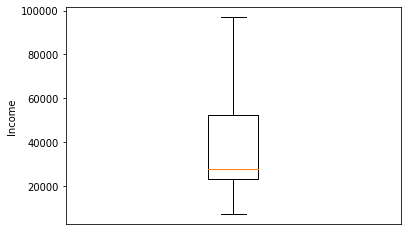

In [15]:
fig, ax = plt.subplots()
ax.boxplot(income_samples, whis=(0,100))
ax.set_ylabel('Income')
ax.set_xticks([]);

**15. How many inhabitants of Fooville have an income above the first quartile?**

*TODO: 75%

**16. How many inhabitants of Fooville have an income between the first and third quartile?**

*TODO: 50%

**17. Which of the following statements are correct? (type an `x` in those boxes)**

*TODO: Fill in the right boxes.*

   - [ ] "25% of all Fooville inhabitants have an income above 20.000"
   - [x ] "50% of all Fooville inhabitants have an income between around 23.000 and around 52.000"
   - [x ] "There are no Fooville inhabitants with an income above 98.000."

**18. Does the mean always fall between the first and third quartile? Explain your answer.**

*TODO: No the mean can be skewed to both sites due to extremes and therefore the mean can be at the extremes as well

**19. Do you think a boxplot is a nice summary of the Fooville income data? Why? How does it compare to the histogram?**

*TODO: Yes it's giving a good overview of the data and more info that with a histogram

That's it for this lesson! You now have an intuitive understanding of:

- The mean
- The median
- The mode
- Binning
- Histograms
- The minimum and maximum
- The first and third quartile
- Boxplots

Congratulations! That's a lot of material to work through.